In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)


%matplotlib inline

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Fill NA & Drop irrelevant columns

In [4]:
for i in df.columns:
    if sum(df[i].isnull()):
        print(df.i)

No NA value

# Feature Engineering

In [5]:
df.Gender = df.Gender.apply(lambda x: 1 if x=='Male' else 0)

In [6]:
df.Attrition = df.Attrition.apply(lambda x: 1 if x=='Yes' else 0)

In [7]:
df.OverTime = df.OverTime.apply(lambda x: 1 if x=='Yes' else 0)

In [8]:
df.drop('EmployeeCount',axis=1, inplace=True)

In [9]:
df.drop('EmployeeNumber',axis=1, inplace=True)

In [10]:
df.drop('Over18',axis=1, inplace=True)

In [11]:
df.drop('StandardHours',axis=1, inplace=True)

# Explornary Data Analysis

This part aims to find out potential reasons for an employee to quit or not, potential reason could be:<br>
<ul>
    <li>Working Distance</li>
    <li>Too much BusinessTravel</li>
    <li>Low EnvironmentSatisfaction</li>
    <li>Gender-based/Education-based Inequality</li>
    <li>Specifc JobLevel or JobRole</li>
    <li>Low JobSatisfaction</li>
    <li>OverTime working</li>
    <li>Terrible WorkLifeBalance</li>
    <li>Absence of TrainingTimesLastYear</li>
    <li>Working at the same role/company/manager for too many years seeking new opportunites</li>
    <li>Lack of activation(Promotion)</li>
</ul>
Need to mention those factors are what relevant to the company itself, other personal factors could also be important, but no need to be taken into consideration by the company.

In [12]:
def gen_bar(column, width = 0.3):
    x = np.arange(len(df[column].unique()))
    width = 0.3
    plt.bar(x,round(df[df.Attrition==1][column].value_counts().sort_index()/df[column].value_counts().sort_index(),2),width = width,label='Attrition',color='b')
#     plt.bar(x+width,round(df[df.Attrition==0][column].value_counts().sort_index()/df[column].value_counts().sort_index(),2),width = width,label = 'Stay',color='b')
    plt.legend()
    plt.xticks(x,df[column].value_counts().sort_index().index)

In [13]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


## 1. Business Travel

In [14]:
round(df.BusinessTravel.value_counts()/len(df),2)

Travel_Rarely        0.71
Travel_Frequently    0.19
Non-Travel           0.10
Name: BusinessTravel, dtype: float64

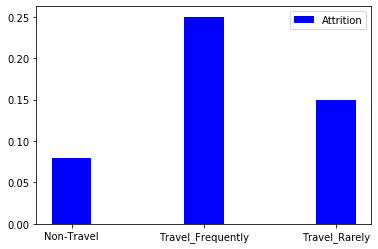

In [15]:
gen_bar('BusinessTravel')

More business travels lead to higher attrition

## 2. Environment Satisfication

In [16]:
round(df.EnvironmentSatisfaction.value_counts().sort_index()/len(df),2)

1    0.19
2    0.20
3    0.31
4    0.30
Name: EnvironmentSatisfaction, dtype: float64

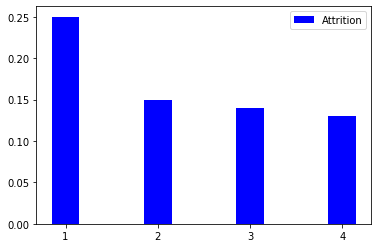

In [17]:
gen_bar('EnvironmentSatisfaction')

Low environment satisfiction indicates a high possible of turnover

## 3. Gender

In [18]:
round(df.Gender.value_counts()/len(df),2)

1    0.6
0    0.4
Name: Gender, dtype: float64

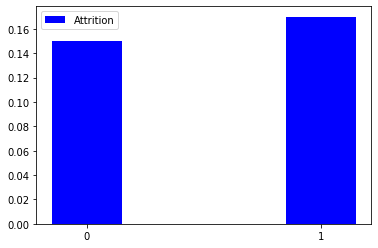

In [19]:
gen_bar('Gender')

Almost the same for gender

## 4. Education

In [20]:
round(df.Education.value_counts()/len(df),2)

3    0.39
4    0.27
2    0.19
1    0.12
5    0.03
Name: Education, dtype: float64

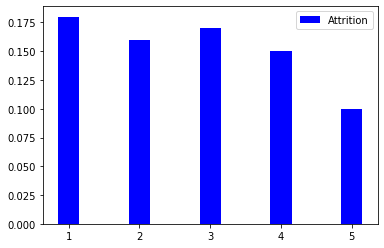

In [21]:
gen_bar('Education')

High education level is more likely to stay

## 5. Specific Role

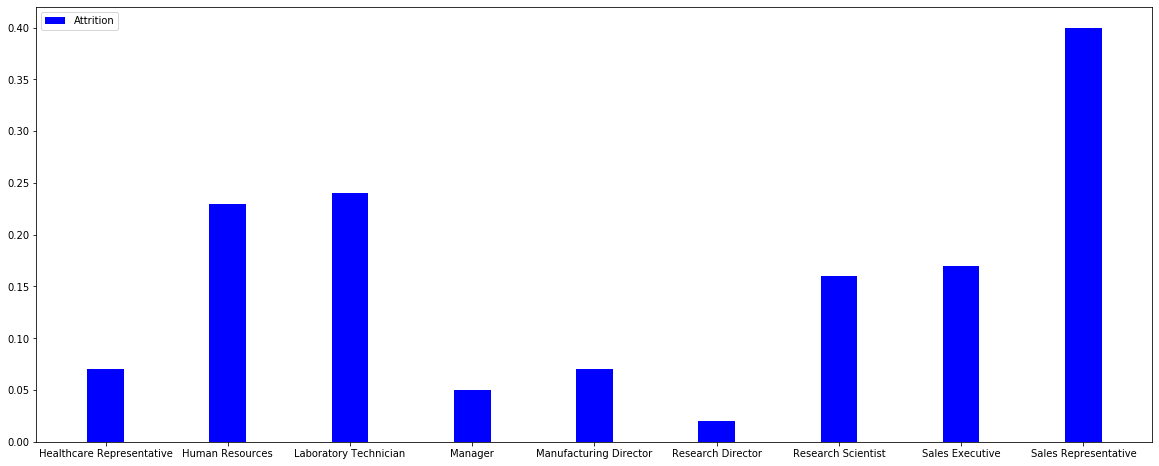

In [22]:
plt.figure(figsize = (20,8))
gen_bar('JobRole')

Top 3 attrition-likely roles are **Sales Representative**, **Laboratory Technician** and **Human Resources**

## 6. Job Satisfaction

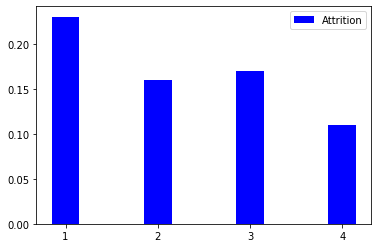

In [23]:
gen_bar('JobSatisfaction')

Generally, lower job satisfaction, higher attrition rate

## 7. Performance Rating

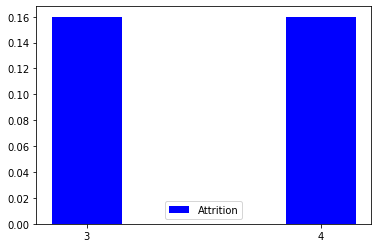

In [24]:
gen_bar('PerformanceRating')

No difference

## 8. Relationship Satisfaction

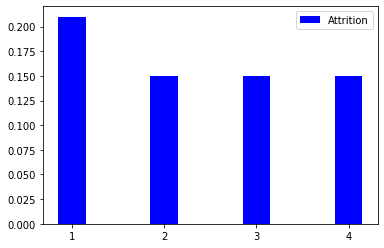

In [25]:
gen_bar('RelationshipSatisfaction')

Lower relationship satisfaction, higher attrition rate

## 9. Work Life Balance

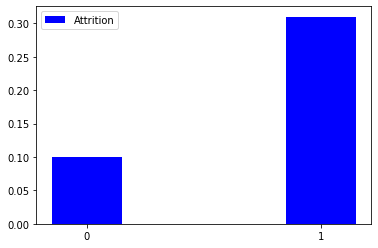

In [26]:
gen_bar('OverTime',width=0.2)

More overtime working, higher attrition rate

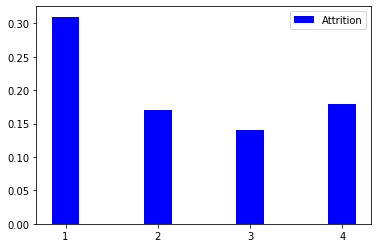

In [27]:
gen_bar('WorkLifeBalance')

Worse work life balance leads to higher attrition, while the highest work life balance level have the second highest attrition rate, may have something to do with position

## 10. Flexibility

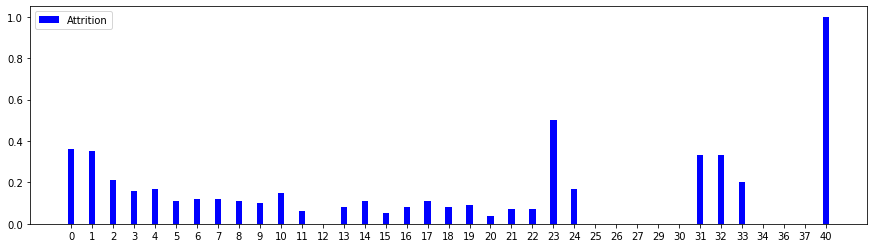

In [28]:
plt.figure(figsize=(15,4))
gen_bar('YearsAtCompany')

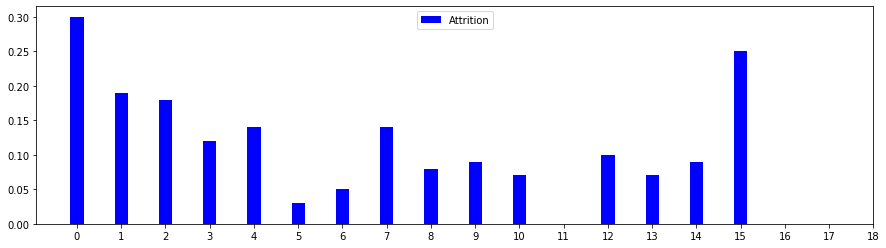

In [29]:
plt.figure(figsize=(15,4))
gen_bar('YearsInCurrentRole')

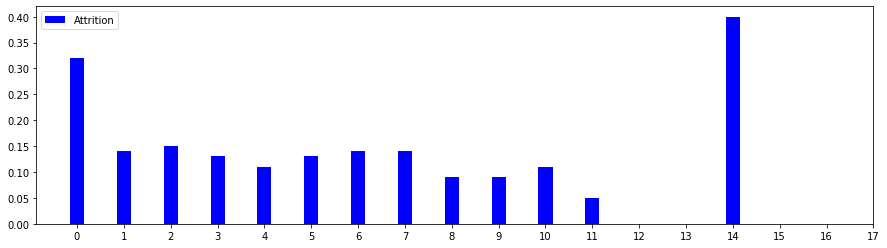

In [30]:
plt.figure(figsize=(15,4))
gen_bar('YearsWithCurrManager')

Some people quit soon after a new position, some may quit because staying at the same company/manager/position too long

## 11. Activation

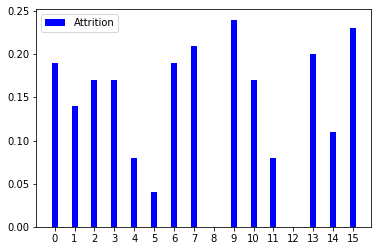

In [31]:
gen_bar('YearsSinceLastPromotion')

No significant difference

## Summary

<ul>
    <li>Better satisfaction in relationship and environment lead to lower attrtion rate</li>
    <li>Overtime working and bad work-life balance cause higher possiblity of attrtion</li>
    <li>Specific positions may have higher attrition</li>
    <li>New-comers and those who stick to the same positions too long may have higher possibility of attrtion</li>
    <li>Activation plans have no significant effect</li>
    <li>Seemly no gender/education-based inequality</li>
</ul>

# Prediction Model

Help the company find employees likely to quit

In [32]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


## Data Preprocessing

In [33]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [34]:
dummy_columns = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']

In [35]:
for i in dummy_columns:
    temp = pd.get_dummies(df[i],prefix=i)
    df = df.join(temp)
    df.drop(i,axis=1,inplace=True)

In [36]:
y = df.Attrition
df.drop('Attrition',axis=1,inplace=True)

In [37]:
x_train,x_test,y_train,y_test = train_test_split(df,y,test_size=0.2)

In [38]:
sm = SMOTE(random_state=522)
x_train,y_train = sm.fit_resample(x_train,y_train)

## Models

In [39]:
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVC

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

from sklearn.metrics import roc_auc_score

In [40]:
def model_score(model,x_train,y_train,x_test,y_test,model_param=None,kfolds = KFold(n_splits=5)):
    if model_param:
        model_best = GridSearchCV(model,model_param,cv=kfolds)
        model_best.fit(x_train,y_train)
        print('Accuracy on training set:',model_best.best_estimator_.score(x_train,y_train))
        print('Accuracy on testing set:',model_best.best_estimator_.score(x_test,y_test))
        print('AUC:',roc_auc_score(y_test,model_best.best_estimator_.predict(x_test)))
        return model_best.best_estimator_
    else:
        model_best = model
        model_best.fit(x_train,y_train)
        print('Accuracy on training set:',model_best.score(x_train,y_train))
        print('Accuracy on testing set:',model_best.score(x_test,y_test))
        print('AUC:',roc_auc_score(y_test,model_best.predict(x_test)))
        return model_best

### I. KNN

In [41]:
KNN_param = {'n_neighbors':[3,5,7,9],'p':[1,2]}
KNN_best = model_score(KNeighborsClassifier(),x_train,y_train,x_test,y_test,KNN_param)

Accuracy on training set: 0.9063136456211812
Accuracy on testing set: 0.6530612244897959
AUC: 0.5462799962938942


### II. LogisticRegression

In [42]:
logistic_param = {'C':[0.001,0.01,0.1,1],'penalty':['l2','l1']}
logistic_best = model_score(LogisticRegression(solver='saga'),x_train,y_train,x_test,y_test,logistic_param)

Accuracy on training set: 0.6023421588594705
Accuracy on testing set: 0.5476190476190477
AUC: 0.5327063837672565


### III.Ensemble

#### XGBoost

In [43]:
xgb_param = {'learning_rate':[0.001,0.01,0.1],'max_depth':[2,3,4]}
xgb_best = model_score(XGBClassifier(),x_train,y_train,x_test,y_test,xgb_param)

Accuracy on training set: 0.9842158859470469
Accuracy on testing set: 0.8979591836734694
AUC: 0.7089780413230797


#### AdaBoost

In [44]:
adb_param = {'n_estimators':[30,40,60,80]}
adb_best = model_score(AdaBoostClassifier(),x_train,y_train,x_test,y_test,adb_param)

Accuracy on training set: 0.9307535641547862
Accuracy on testing set: 0.8843537414965986
AUC: 0.7588251644584454


#### RandomForest

In [45]:
rf_param = {'n_estimators':[80,100,120],'max_depth':[2,3,4]}
rf_best = model_score(RandomForestClassifier(),x_train,y_train,x_test,y_test,rf_param)

Accuracy on training set: 0.8915478615071283
Accuracy on testing set: 0.8197278911564626
AUC: 0.6824330584638191


### IV. Naive Bayers

#### GaussianNB

In [46]:
GaussianNB_best = model_score(GaussianNB(),x_train,y_train,x_test,y_test)

Accuracy on training set: 0.7815682281059063
Accuracy on testing set: 0.6632653061224489
AUC: 0.6389789678495321


#### MultinomialNB

In [47]:
MultinomialNB_best = model_score(MultinomialNB(),x_train,y_train,x_test,y_test)

Accuracy on training set: 0.5667006109979633
Accuracy on testing set: 0.5408163265306123
AUC: 0.5190864449180024


#### BernoulliNB

In [48]:
BernoulliNB_best = model_score(BernoulliNB(),x_train,y_train,x_test,y_test)

Accuracy on training set: 0.8543788187372708
Accuracy on testing set: 0.8163265306122449
AUC: 0.6708051514870749


### V.  QDA

In [49]:
QDA_best = model_score(QDA(),x_train,y_train,x_test,y_test)

Accuracy on training set: 0.8966395112016293
Accuracy on testing set: 0.8537414965986394
AUC: 0.5


C:\Users\Hanyu Zou\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


### VI. GaussianProcessClassfier

In [50]:
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
GPR_param = {'kernel':['1.0 * RBF(1.0)',DotProduct(),WhiteKernel(),DotProduct()+WhiteKernel()]}
GPR_best = model_score(GaussianProcessClassifier(),x_train,y_train,x_test,y_test)

Accuracy on training set: 1.0
Accuracy on testing set: 0.8537414965986394
AUC: 0.5


In [51]:
GPR_best.predict_proba(x_test)

array([[0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5,

### VII. Stacking Model

In [52]:
from scipy.stats import mode
from sklearn.base import clone
class stackingmodel():
    def __init__(self,base_models, base_models_param,meta_model,meta_model_param):
        self.base_models = base_models
        self.meta_model = meta_model
        self.param = base_models_param
        self.meta_param = meta_model_param
    
    def fit(self,x_train,y_train):
        self.base_models_ = [list() for i in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        x_ = np.zeros((len(y_train),len(self.base_models)))
        kfolds = KFold(n_splits=5,shuffle=True)
        for i,base_model in enumerate(self.base_models):
            for train_index, test_index in kfolds.split(x_train,y_train):
                if self.param[i]:
                    model_temp = GridSearchCV(base_model,self.param[i],cv=kfolds,verbose=True)
                    model_temp.fit(x_train.iloc[train_index,:],y_train.iloc[train_index])
                    self.base_models_[i].append(model_temp.best_estimator_)
                    x_[test_index,i] = self.base_models_[i][-1].predict(x_train.iloc[test_index,:])
                else:
                    model_temp = base_model
                    model_temp.fit(x_train.iloc[train_index,:],y_train.iloc[train_index])
                    self.base_models_[i].append(model_temp)
                    x_[test_index,i] = self.base_models_[i][-1].predict(x_train.iloc[test_index,:])
        self.meta_model_ = GridSearchCV(self.meta_model,self.meta_param,cv=kfolds,verbose=True)
        self.meta_model_.fit(x_,y_train)
        return self
    
    def predict(self,x):
        kfolds = KFold(n_splits=5,shuffle=True)
        x_ = np.zeros((len(x),len(self.base_models)))
        for i,base_model in enumerate(self.base_models_):
            x_[:,i] = mode([j.predict(x) for j in base_model],axis=0)[0]
        return self.meta_model_.best_estimator_.predict(x_)
            

In [53]:
stack_model = stackingmodel([XGBClassifier(),BernoulliNB(),GaussianNB()],
                            [{'learning_rate':[0.001,0.01,0.1],'max_depth':[2,3,4]},
                             None,None],
                            AdaBoostClassifier(),{'n_estimators':[30,40,60,80]})
stack_model.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    8.9s finished


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    9.7s finished


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    8.8s finished


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    8.7s finished


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    9.1s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.9s finished


In [54]:
print('Training Error:', np.mean(stack_model.predict(x_train)==y_train))
print('Testing Error:', np.mean(stack_model.predict(x_test)==y_test))

Training Error: 0.9740325865580448
Testing Error: 0.8945578231292517


Stacking Model has the best result, while hard to be measured by AUC

## Conclusions

In [55]:
models = ['LogisticRegression','QDA','GaussianNB','BernoulliNB','MultinomialNB','AdaBoost','XGBoost','GaussianProcessClassfier']
result = pd.DataFrame({'AUC':[roc_auc_score(y_test,logistic_best.predict(x_test)),
                              roc_auc_score(y_test,QDA_best.predict(x_test)),
                              roc_auc_score(y_test,GaussianNB_best.predict(x_test)),
                              roc_auc_score(y_test,BernoulliNB_best.predict(x_test)),
                              roc_auc_score(y_test,MultinomialNB_best.predict(x_test)),
                              roc_auc_score(y_test,adb_best.predict(x_test)),
                              roc_auc_score(y_test,xgb_best.predict(x_test)),
                              roc_auc_score(y_test,GPR_best.predict(x_test))]})
result.rename(index={i:x for i,x in enumerate(models)})

,AUC
LogisticRegression,0.532706
QDA,0.500000
GaussianNB,0.638979
BernoulliNB,0.670805
MultinomialNB,0.519086
AdaBoost,0.758825
XGBoost,0.708978
GaussianProcessClassfier,0.500000


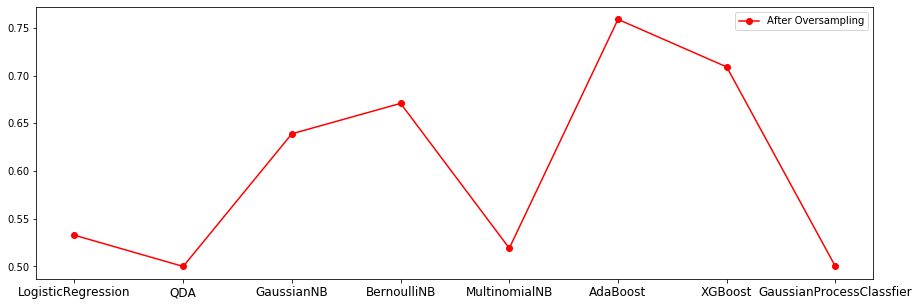

In [56]:
fig = plt.figure(figsize=(15,5))
plt.rc('xtick',labelsize=12)
plt.plot(models,result['AUC'],label='After Oversampling',color='r',marker = 'o')
plt.legend()

Overfitting occurs in QDA and GaussianProcessClassifier

In [57]:
models = ['LogisticRegression','QDA','GaussianNB','BernoulliNB','MultinomialNB','AdaBoost','XGBoost','GaussianProcessClassfier','Stacking Model']
result = pd.DataFrame({'Training Accuracy':[np.mean(y_train==logistic_best.predict(x_train)),
                                         np.mean(y_train==QDA_best.predict(x_train)),
                                         np.mean(y_train==GaussianNB_best.predict(x_train)),
                                         np.mean(y_train==BernoulliNB_best.predict(x_train)),
                                         np.mean(y_train==MultinomialNB_best.predict(x_train)),
                                         np.mean(y_train==adb_best.predict(x_train)),
                                         np.mean(y_train==xgb_best.predict(x_train)),
                                         np.mean(y_train==GPR_best.predict(x_train)),
                                         np.mean(y_train==stack_model.predict(x_train))],
                       'Testing Accuracy':[np.mean(y_test==logistic_best.predict(x_test)),
                                         np.mean(y_test==QDA_best.predict(x_test)),
                                         np.mean(y_test==GaussianNB_best.predict(x_test)),
                                         np.mean(y_test==BernoulliNB_best.predict(x_test)),
                                         np.mean(y_test==MultinomialNB_best.predict(x_test)),
                                         np.mean(y_test==adb_best.predict(x_test)),
                                         np.mean(y_test==xgb_best.predict(x_test)),
                                         np.mean(y_test==GPR_best.predict(x_test)),
                                         np.mean(y_test==stack_model.predict(x_test))]})
result.rename(index={i:x for i,x in enumerate(models)})

,Training Accuracy,Testing Accuracy
LogisticRegression,0.602342,0.547619
QDA,0.896640,0.853741
GaussianNB,0.781568,0.663265
BernoulliNB,0.854379,0.816327
MultinomialNB,0.566701,0.540816
AdaBoost,0.930754,0.884354
XGBoost,0.984216,0.897959
GaussianProcessClassfier,1.000000,0.853741
Stacking Model,0.974033,0.894558


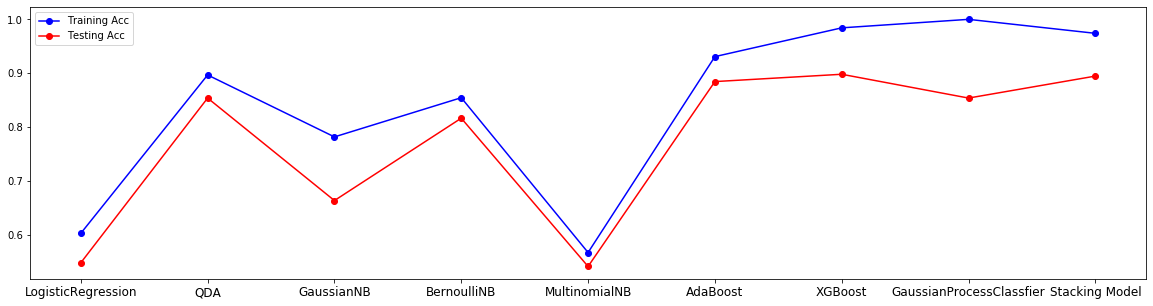

In [58]:
fig = plt.figure(figsize=(20,5))
plt.rc('xtick',labelsize=12)
plt.plot(models,result['Training Accuracy'],label='Training Acc',color='b',marker = 'o')
plt.plot(models,result['Testing Accuracy'],label='Testing Acc',color='r',marker = 'o')
plt.legend()

# Top Important Factors

Take AdaBoost as the best model, the top 10 relevant features should be taken into consideration if the company want to reduce the attrition

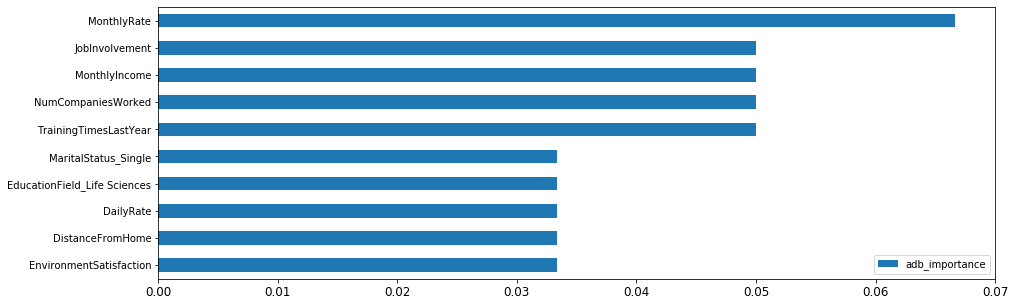

In [59]:
feature_importance = pd.DataFrame({'adb_importance':adb_best.feature_importances_}).set_index(x_train.columns)
feature_importance.sort_values('adb_importance',ascending=True)[-10:].plot.barh(figsize=(15,5))

Those features could be divided into two groups: personal characters and company charactures:<br>
<br>
**Personal:**
<ol>    
    <li>Income</li>
    <li>Martial Status</li>
    <li>Education Field (Medical, Life Sciences)</li>
    <li>Distance From Home</li>
</ol>

__Company:__
<ol>    
    <li>Job Involvement</li>
    <li>Distance From Home</li>
    <li>Business Travel</li>
</ol>
<br>Clearly for personal factors, raising income could keep more employees in the company, while other personal factors might be difficult to changed.</br>
The company side could focus on lifting the job involvement and reducing business travel times as possible. Perhaps some commuting benefits for those live far from the company could be helpful to make employees stay.